<a href="https://colab.research.google.com/github/LCaravaggio/CienciadeDatos/blob/main/Computer%20Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de imagen


In [ ]:
import requests
from PIL import Image
from io import BytesIO

url = 'https://www.bellasartes.gob.ar/media/uploads/exhibiciones/8_12_Caravaggio_03_SanGirolamochescrive-Caravaggio.jpg'
response = requests.get(url)

if response.status_code == 200:
    img = Image.open(BytesIO(response.content))
else:
    print("Failed to download the image")

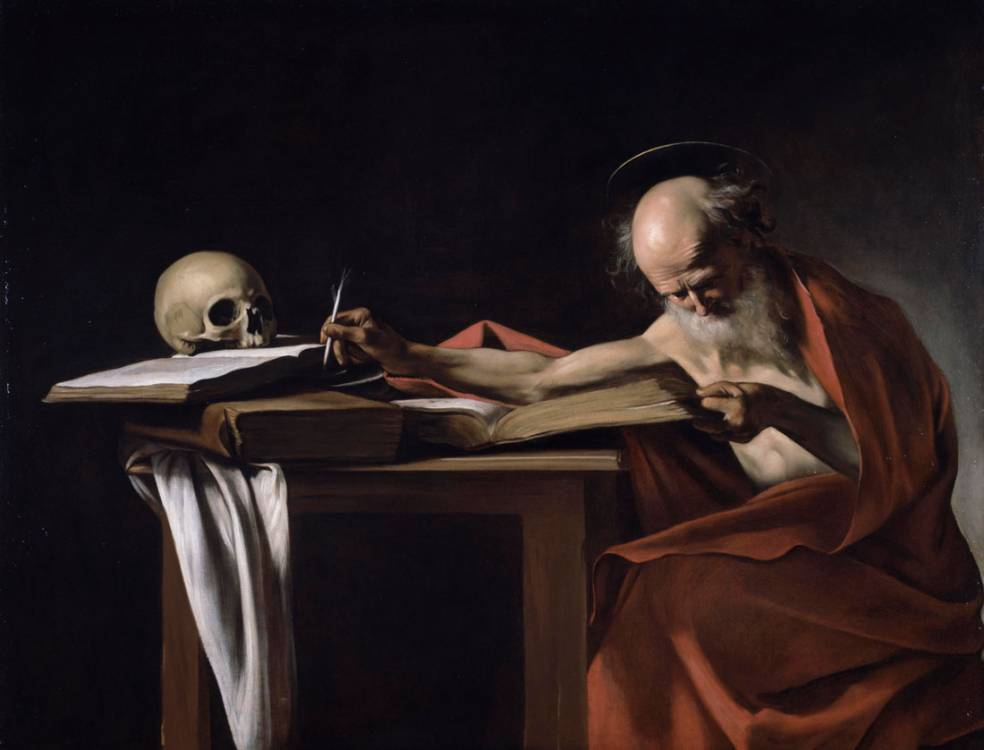

In [ ]:
display(img)

# Características

In [ ]:
img.size

(984, 750)

In [ ]:
img.format

'JPEG'

In [ ]:
img.mode

'RGB'

# Thumbnail

In [ ]:
img.thumbnail((256,256))

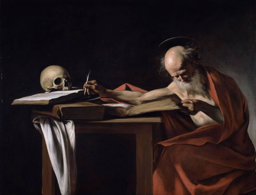

In [ ]:
display(img)

# Rotación

In [ ]:
out = img.rotate(45)

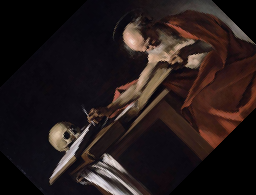

In [ ]:
display(out)

In [ ]:
out=img.transpose(method=Image.FLIP_TOP_BOTTOM)

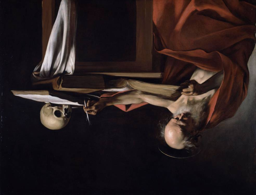

In [ ]:
display(out)

# Cropeado

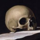

In [ ]:
left = 35
top = 60
right = 75
bottom = 100

out = img.crop((left, top, right, bottom))
out

In [ ]:
out.save("croped_img.jpg")

# Blureado

https://pillow.readthedocs.io/en/stable/reference/ImageFilter.html

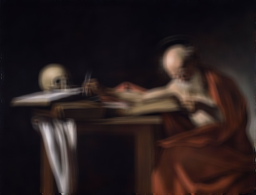

In [ ]:
from PIL import ImageFilter
img.filter(ImageFilter.BLUR)

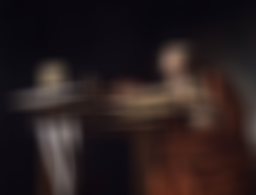

In [ ]:
img.filter(ImageFilter.BoxBlur(10))

# Facial Emotion Recognition - Clarin

In [ ]:
%%capture
!pip install fer

In [ ]:
from fer import FER
import requests
from PIL import Image
from io import BytesIO

  if event.key is 'enter':



In [ ]:
url = 'https://tapas.clarin.com/tapa/2023/12/29/20231229.jpg'
response = requests.get(url)

if response.status_code == 200:
    img = Image.open(BytesIO(response.content))
else:
    print("Failed to download the image")

In [ ]:
import tempfile
with tempfile.NamedTemporaryFile(suffix='.jpg', delete=False) as temp_file:
    img.save(temp_file.name)
    temp_file_path = temp_file.name

In [ ]:
detector = FER()
emotions = detector.detect_emotions(temp_file_path)
print(emotions)

[{'box': array([1343,  118,  100,  100], dtype=int32), 'emotions': {'angry': 0.28, 'disgust': 0.01, 'fear': 0.27, 'happy': 0.0, 'sad': 0.16, 'surprise': 0.04, 'neutral': 0.23}}, {'box': array([1036,  120,  101,  101], dtype=int32), 'emotions': {'angry': 0.75, 'disgust': 0.0, 'fear': 0.07, 'happy': 0.14, 'sad': 0.02, 'surprise': 0.0, 'neutral': 0.01}}]


In [ ]:
emotions[0]['box'][0]

1343

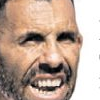

{'angry': 0.75, 'disgust': 0.0, 'fear': 0.07, 'happy': 0.14, 'sad': 0.02, 'surprise': 0.0, 'neutral': 0.01}


In [ ]:
face=1

left=emotions[face]['box'][0]
top=emotions[face]['box'][1]
right=emotions[face]['box'][0]+emotions[0]['box'][2]
bottom=emotions[face]['box'][1]+emotions[0]['box'][3]
display(img.crop((left, top, right, bottom)))

print(emotions[face]['emotions'])

# Object Detection

In [ ]:
%%capture
!pip install imageai
!pip install --upgrade Pillow

!pip install torch torchvision torchaudio
!pip install yolov5

!wget https://www.italyperfect.com/blog/wp-content/uploads/2014/07/Caravaggio-Michelangelo_Merisi_da-The_Calling_of_Saint_Matthew.jpg

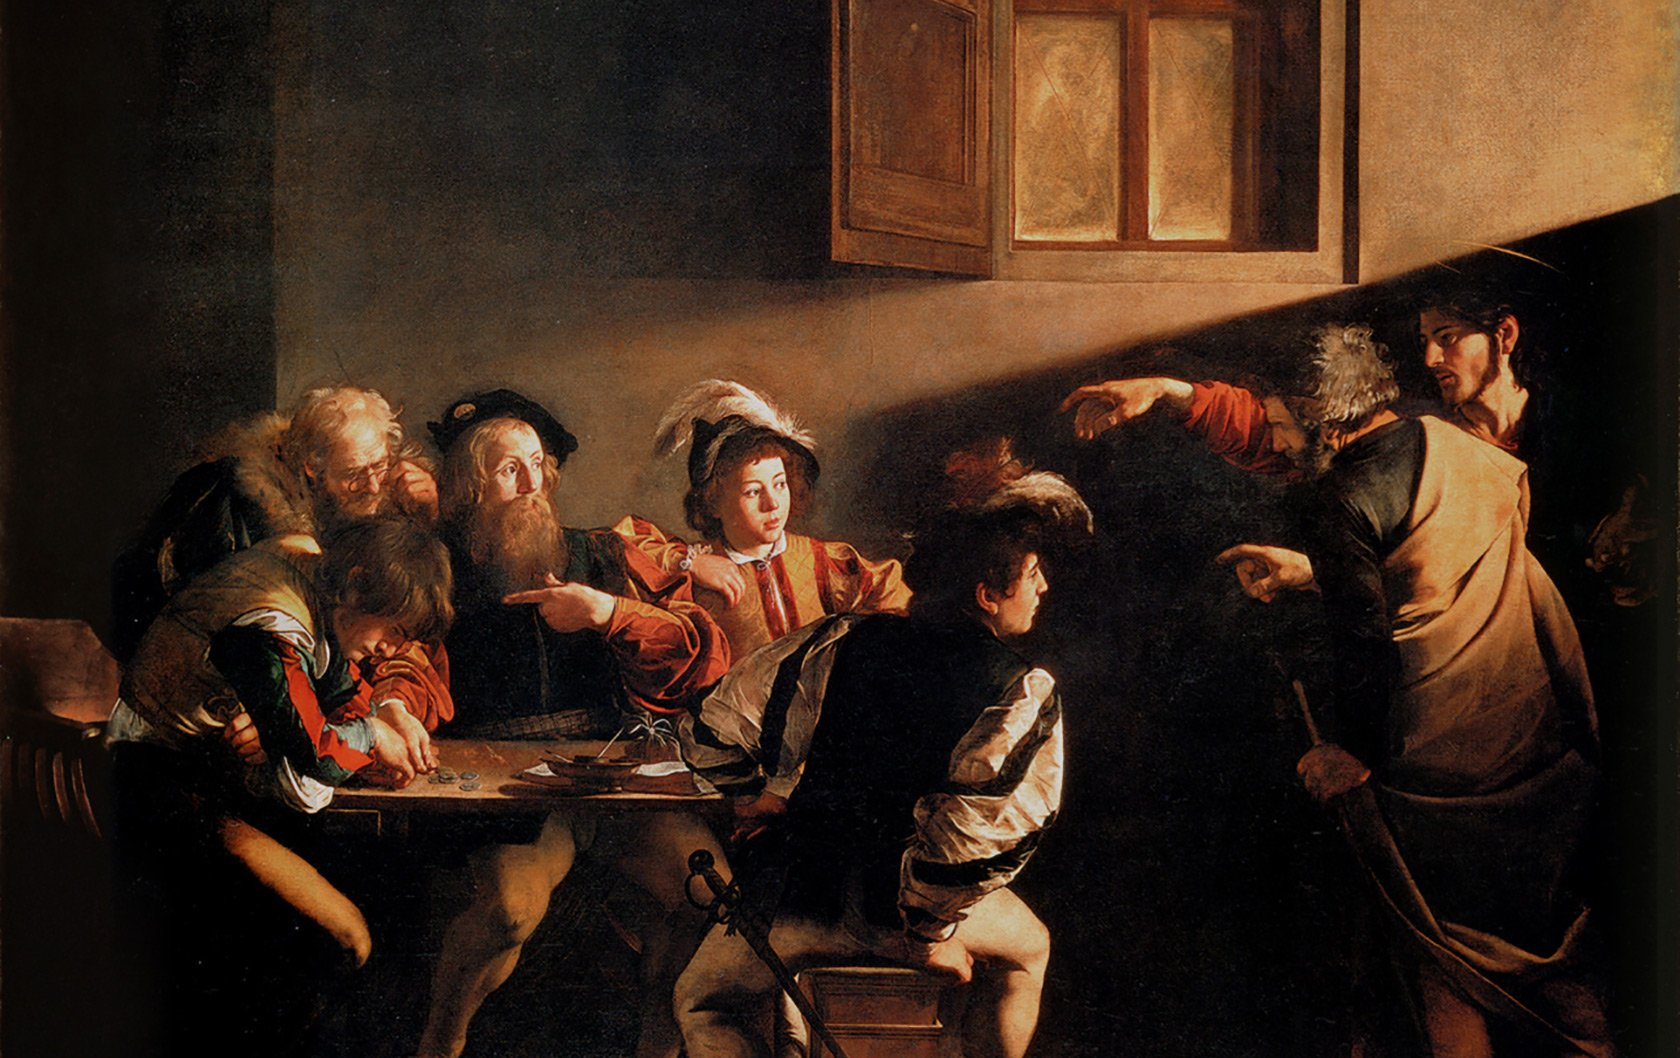

In [ ]:
img_path = '/content/Caravaggio-Michelangelo_Merisi_da-The_Calling_of_Saint_Matthew.jpg'
img = Image.open(img_path)
display(img)

In [ ]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-12-10 Python-3.10.12 torch-2.2.2+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


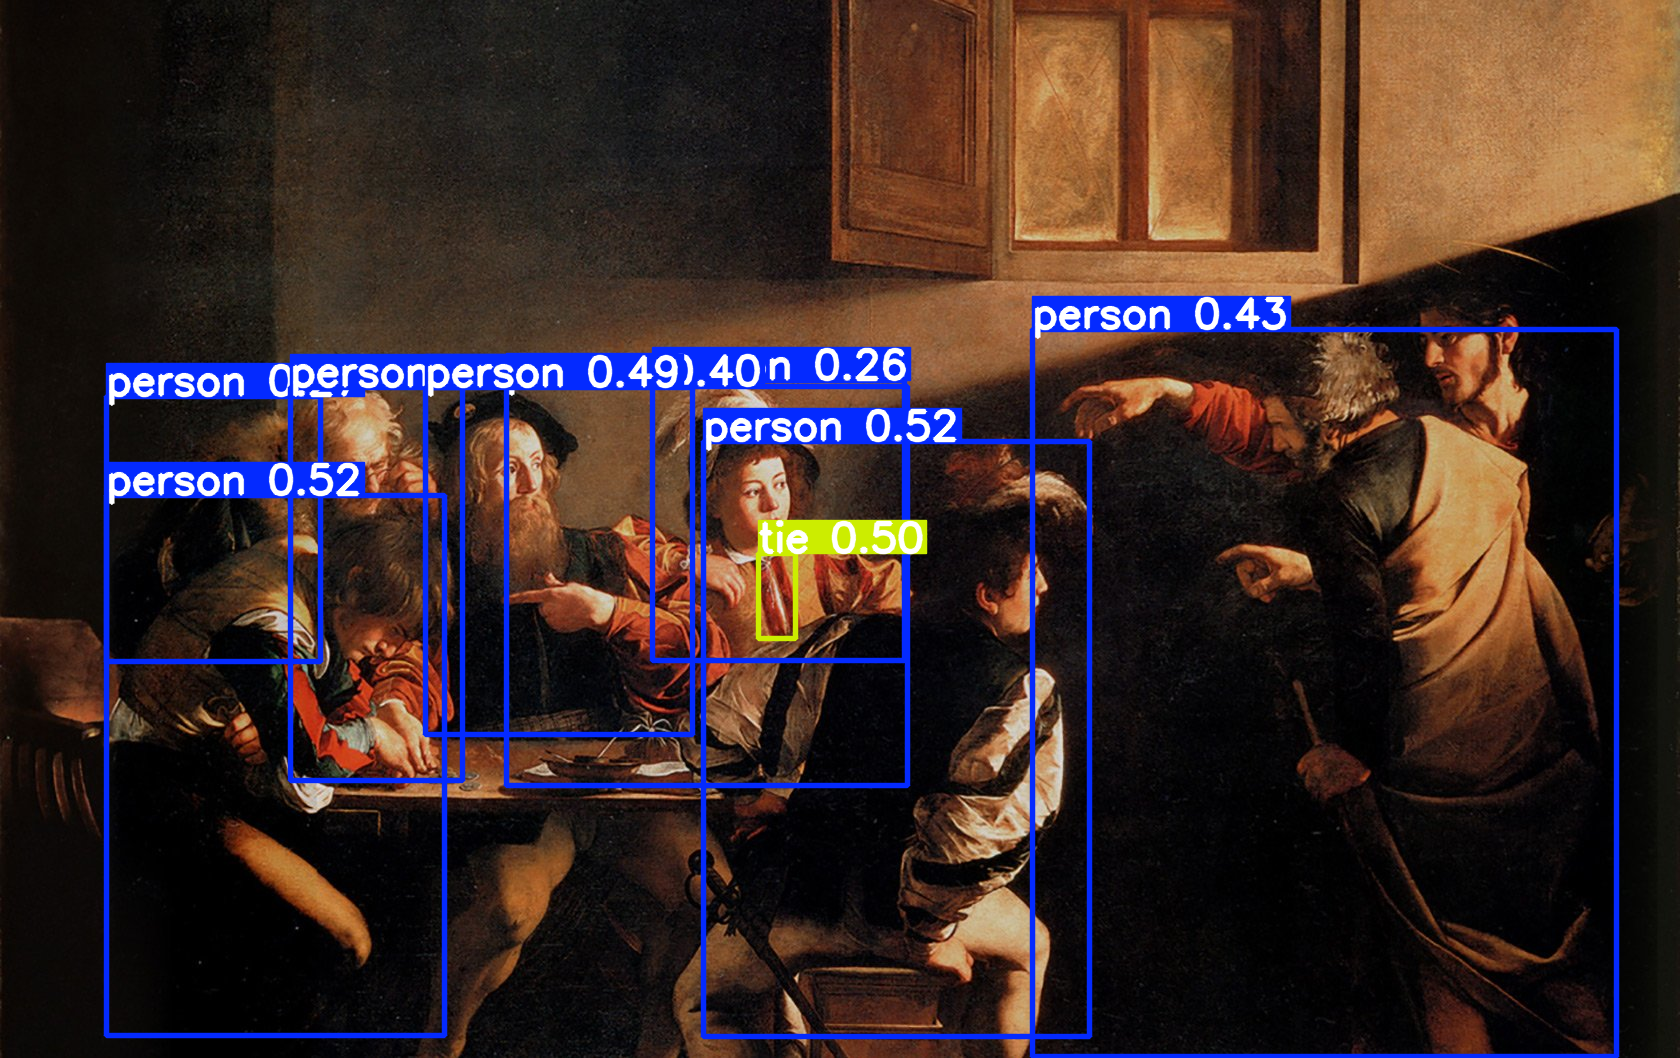

[       xcenter     ycenter       width      height  confidence  class    name
0   896.218750  739.215698  386.172058  595.543213    0.522297      0  person
1   275.641815  765.667480  338.086487  539.500671    0.518984      0  person
2   776.854675  596.378357   37.689697   84.986206    0.503649     27     tie
3   558.824219  560.891541  267.295624  346.806641    0.492711      0  person
4  1324.578369  692.960327  584.140259  726.335693    0.434357      0  person
5   706.702759  585.828430  401.263245  399.120697    0.404627      0  person
6   376.567749  584.013428  172.443085  392.874207    0.332948      0  person
7   213.764938  529.255310  213.553375  264.725220    0.265188      0  person
8   778.317383  520.351868  252.634766  280.358887    0.264090      0  person]


In [ ]:
results = model(img)


results.show()

print(results.pandas().xywh)